## Loading data from the simulation output - the automatic way

This example uses a third party library, disgrid, to load data from the simulation outputs with minimal effort.
Disclaimer, I (Thomas Rometsch) wrote the tool. Feel free to just use `np.genfromtxt` to load the time series data.

We will use the data from the simulation in the quickstart example, so make sure you ran this beforehand.

We'll first create a Data object and ask what's available in the output. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
#!pip install git+https://github.com/rometsch/disgrid
from disgrid import Data
d = Data("output/out")
# d.avail()

Text(0, 0.5, '$T/T_0 - 1$')

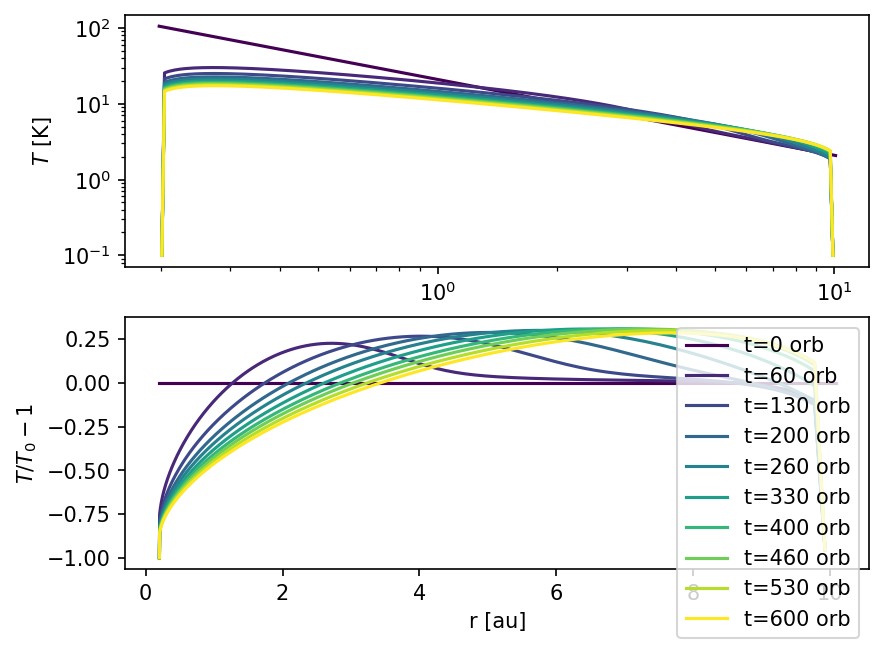

In [12]:
name = "energy"
dataunit = "J/cm2"

Nfirst = d.avail()["Nfirst"]
Nlast = d.avail()["Nlast"]

fig, axes = plt.subplots(nrows=2, dpi=150)

field = d.get(dim="2d", var=name, N=0)
grid = field.grid
Nr = len(grid.get_centers("r"))
Nphi = len(grid.get_centers("phi"))
T = np.fromfile(d.path+"/snapshots/0/Temperature.dat", dtype=np.float64).reshape(Nr, Nphi)*3556.67281008706
profile0 = np.average(T, axis=1)

cmap = plt.cm.get_cmap("viridis")

inds = np.linspace(Nfirst, Nlast, 10, dtype=int)
for k, n in enumerate(inds):
    color = cmap(k/(len(inds)-1))
    
    field = d.get(dim="2d", var=name, N=n)
    T = np.fromfile(d.path+f"/snapshots/{n}/Temperature.dat", dtype=np.float64).reshape(Nr, Nphi)*3556.67281008706

    r = grid.get_centers("r").to_value("au")
    Z = T

    
    y = np.average(Z, axis=1)
    
    t = field.time.to_value("yr")/1**1.5
    # ax.plot(r, (profile-profile0)/profile0, label=f"t={t:.3f}yr")
    line, = axes[0].plot(r, y, label=f"t={t} orbits", color=color)
    y = np.average(Z, axis=1)/profile0 - 1
    line, = axes[1].plot(r, y, label=f"t={t:.0f} orb", color=color)
    
axes[1].legend()
axes[0].set_yscale("log")
axes[0].set_xscale("log")
axes[1].set_xlabel("r [au]")
axes[0].set_ylabel(fr"$T$ [K]")
axes[1].set_ylabel(fr"$T/T_0 - 1$")

/tmp/ipykernel_3451121/3130883124.py:27: RuntimeWarning: invalid value encountered in true_divide
  line, = axes[1].plot(r, y/profile0 - 1, label=f"t={t:.0f} orb", color=color)
/tmp/ipykernel_3451121/3130883124.py:27: RuntimeWarning: invalid value encountered in true_divide
  line, = axes[1].plot(r, y/profile0 - 1, label=f"t={t:.0f} orb", color=color)
/tmp/ipykernel_3451121/3130883124.py:27: RuntimeWarning: invalid value encountered in true_divide
  line, = axes[1].plot(r, y/profile0 - 1, label=f"t={t:.0f} orb", color=color)
/tmp/ipykernel_3451121/3130883124.py:27: RuntimeWarning: invalid value encountered in true_divide
  line, = axes[1].plot(r, y/profile0 - 1, label=f"t={t:.0f} orb", color=color)
/tmp/ipykernel_3451121/3130883124.py:27: RuntimeWarning: invalid value encountered in true_divide
  line, = axes[1].plot(r, y/profile0 - 1, label=f"t={t:.0f} orb", color=color)
/tmp/ipykernel_3451121/3130883124.py:27: RuntimeWarning: invalid value encountered in true_divide
  line, = axes[1]

Text(0, 0.5, '$\\Sigma/\\Sigma_0 -1$')

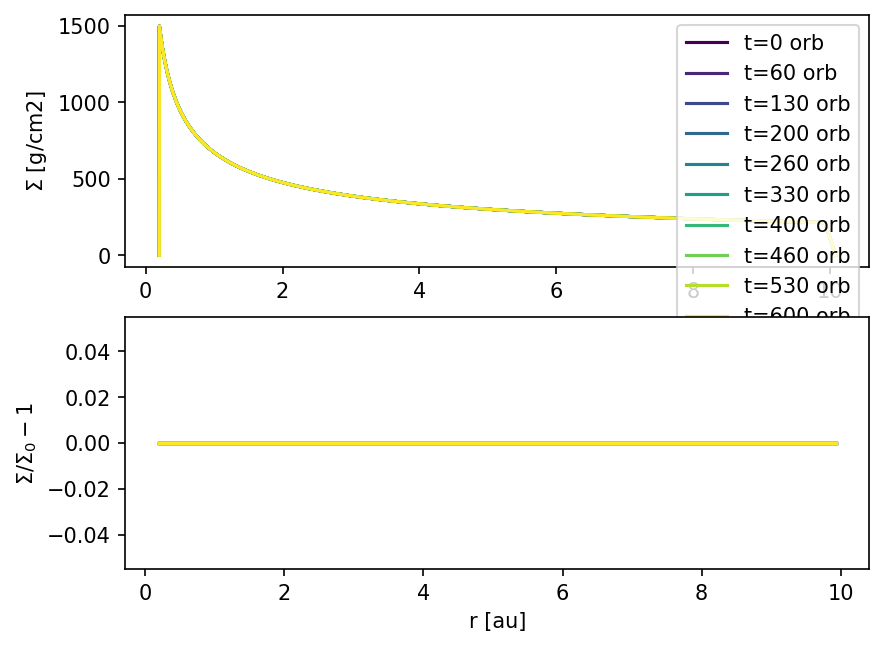

In [7]:
name = "mass density"
dataunit = "g/cm2"

Nfirst = d.avail()["Nfirst"]
Nlast = d.avail()["Nlast"]

fig, axes = plt.subplots(nrows=2, dpi=150)

field = d.get(dim="2d", var="mass density", N=0)
profile0 = np.average(field.data.to_value(dataunit), axis=1)

cmap = plt.cm.get_cmap("viridis")

inds = np.linspace(Nfirst, Nlast, 10, dtype=int)
for k, n in enumerate(inds):
    color = cmap(k/(len(inds)-1))
    
    field = d.get(dim="2d", var="mass density", N=n)
    r = field.grid.get_centers("r").to_value("au")
    Z = field.data.to_value(dataunit)
    
    y = np.average(Z, axis=1)
    
    t = field.time.to_value("yr")/1**1.5
    # ax.plot(r, (profile-profile0)/profile0, label=f"t={t:.3f}yr")
    line, = axes[0].plot(r, y, label=f"t={t:.0f} orb", color=color)
    line, = axes[1].plot(r, y/profile0 - 1, label=f"t={t:.0f} orb", color=color)
    
axes[0].legend()
axes[0].set_ylabel(fr"$\Sigma$ [{dataunit}]")
# ax.set_yscale("log")
axes[1].set_xlabel("r [au]")
axes[1].set_ylabel(fr"$\Sigma/\Sigma_0 -1$")

Text(0, 0.5, '$e$ [J/cm2]')

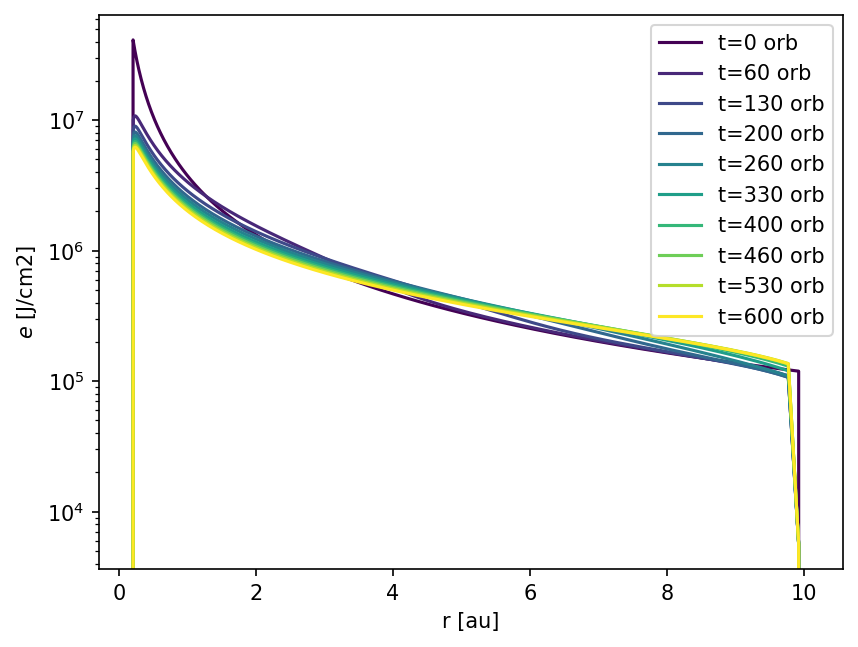

In [8]:
name = "energy"
dataunit = "J/cm2"

Nfirst = d.avail()["Nfirst"]
Nlast = d.avail()["Nlast"]

fig, ax = plt.subplots(dpi=150)

field = d.get(dim="2d", var=name, N=0)
profile0 = np.average(field.data.to_value(dataunit), axis=1)

cmap = plt.cm.get_cmap("viridis")

inds = np.linspace(Nfirst, Nlast, 10, dtype=int)
for k, n in enumerate(inds):
    color = cmap(k/(len(inds)-1))
    
    field = d.get(dim="2d", var=name, N=n)
    r = field.grid.get_centers("r").to_value("au")
    Z = field.data.to_value(dataunit)
    
    y = np.average(Z, axis=1)
    
    t = field.time.to_value("yr")/1**1.5
    # ax.plot(r, (profile-profile0)/profile0, label=f"t={t:.3f}yr")
    line, = ax.plot(r, y, label=f"t={t:.0f} orb", color=color)
    
ax.legend()
ax.set_yscale("log")
ax.set_xlabel("r [au]")
ax.set_ylabel(fr"$e$ [{dataunit}]")

In [9]:
d.path

'output/out'